In [1]:
%load_ext autoreload

# --------------- #
# region: Imports #
import os
import sys
module_path = os.path.abspath('../../..')
if module_path not in sys.path:
    sys.path.insert(0, module_path)
# endregion       #
# --------------- #

In [2]:
%autoreload 2
# from examples.ft.test import eval_model

# results = eval_model(
#     'memories',
#     model_path='../models/checkpoints/model_iRainbowModel_0.0_5.pkl',
#     config_path='../config.yaml',
#     n_games=1000
# )

# results['memories'].save('../models/checkpoints/memories.pkl')

import argparse
import numpy as np
from IPython.display import clear_output
from matplotlib import pyplot as plt

from gem.utils import fig2img, animate, visual_field
from gem.config import load_config
from gem.models.humanPlayer import ModelHumanPlayer
from gem.models.buffer import ActionBatchReplayBuffer as ABRBuffer

from examples.trucks.env import FoodTrucks
from examples.trucks.config import create_agents, create_entities
from examples.trucks.utils import color_map

# ------------------------------------------------------ #
# region: Create the forward model for the animations... #
# ------------------------------------------------------ #

cfg = load_config(argparse.Namespace(config='../configs/config.yaml'))
models = [
  ModelHumanPlayer(action_space=4, memory_size=5)
]
agents = create_agents(cfg, models)
entities = create_entities(cfg)
env = FoodTrucks(cfg, agents, entities)

# ------------------------------------------------------ #
# endregion                                              #

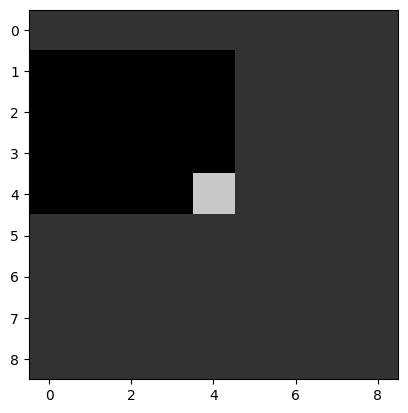

Please try again. Possible actions are below.
[0 1 2 3]


UnboundLocalError: cannot access local variable 'action' where it is not associated with a value

In [3]:
env.reset()
for agent in agents:
  agent.reset()

done, turn = 0, 0

while done == 0:

# ----------------- #
# region: Turn loop #
# ----------------- #

  for agent in agents:

    fig = visual_field(env.world, color_map=color_map, location = agent.location, vision = agent.vision, return_rgb=True)
    clear_output(wait=True)
    plt.imshow(fig)
    plt.show()

    state, action, reward, next_state, done_ = agent.transition(env)

    # If agent finished or max turns is reached, end the turn
    if turn >= cfg.experiment.max_turns or done_: 
      done = 1 # End loop if maximum turns have been reached

    # Append the experience to the replay
    exp = (0, (state, action, reward, next_state, done))
    agent.episode_memory.append(exp)

# ----------------- #
# endregion         #
# ----------------- #

In [15]:
-1 % 4

3